In [1]:
import sys
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install numpy


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [40]:
import pandas as pd
import numpy as np

Считаем датасет по API. Дропнем не нужные колонки.

In [41]:
df = pd.read_csv('api.csv')
df = df.drop(columns='Unnamed: 0')
df = df.drop(columns='reaction_null')
df.head()

,channel,text,views,date,comments,media,reaction_🙏,reaction_💯,reaction_❤,reaction_👏,...,tag_МВД,tag_Турция,tag_Образование,tag_Полиция,tag_США,tag_Искусственный интеллект,tag_НАТО,tag_ЖКХ,tag_Китай,tag_Интернет
0,@novosti_voinaa,NaN,17202.0,2025-03-02 13:47:41,21.0,NaN,0,0,27,0,...,0,0,0,0,0,0,0,0,0,0
1,@novosti_voinaa,На Global Investors Summit 2025 в Индии толпа ...,55440.0,2025-03-02 12:27:44,38.0,VIDEO,0,0,4,0,...,0,0,0,0,0,1,0,0,0,0
2,@novosti_voinaa,"Помните самого богатого депутата Сургута, кото...",82757.0,2025-03-02 11:07:01,51.0,VIDEO,0,0,22,0,...,0,0,0,0,0,0,0,0,0,0
3,@novosti_voinaa,В США мужчина три раза чихнул и чуть не умер и...,105608.0,2025-03-02 09:47:44,41.0,PHOTO,0,0,40,0,...,0,0,0,0,1,1,0,0,0,0
4,@novosti_voinaa,🤬 Новорожденного выбросили в мусорный бак в Ор...,157439.0,2025-03-01 23:52:42,407.0,PHOTO,0,0,34,0,...,1,0,0,1,0,1,0,0,0,0


Удалим колонки в которых все поля пустые (ошибка обращения к API, непредвиденные ситуации).

In [42]:
tags = df.columns[df.columns.str.startswith("tag_")]
reactions = df.columns[df.columns.str.startswith("reaction_")]
df_cleared = df[(df["text"].str.len() > 0) & (df.views > 0) & (df[tags].fillna(0) != 0).any(axis=1) & (df[reactions].fillna(0) != 0).any(axis=1)]
df_cleared.head()

,channel,text,views,date,comments,media,reaction_🙏,reaction_💯,reaction_❤,reaction_👏,...,tag_МВД,tag_Турция,tag_Образование,tag_Полиция,tag_США,tag_Искусственный интеллект,tag_НАТО,tag_ЖКХ,tag_Китай,tag_Интернет
1,@novosti_voinaa,На Global Investors Summit 2025 в Индии толпа ...,55440.0,2025-03-02 12:27:44,38.0,VIDEO,0,0,4,0,...,0,0,0,0,0,1,0,0,0,0
2,@novosti_voinaa,"Помните самого богатого депутата Сургута, кото...",82757.0,2025-03-02 11:07:01,51.0,VIDEO,0,0,22,0,...,0,0,0,0,0,0,0,0,0,0
3,@novosti_voinaa,В США мужчина три раза чихнул и чуть не умер и...,105608.0,2025-03-02 09:47:44,41.0,PHOTO,0,0,40,0,...,0,0,0,0,1,1,0,0,0,0
4,@novosti_voinaa,🤬 Новорожденного выбросили в мусорный бак в Ор...,157439.0,2025-03-01 23:52:42,407.0,PHOTO,0,0,34,0,...,1,0,0,1,0,1,0,0,0,0
5,@novosti_voinaa,26-метровый замок сожгли на Масленицу в калужс...,142749.0,2025-03-01 22:38:04,66.0,VIDEO,0,0,62,0,...,0,0,0,0,0,1,1,0,0,0


Посмотри сколько отчистилось.

In [43]:
print("Процент значений очищенных:", 1 - df_cleared.shape[0]/df.shape[0])

Процент значений очищенных: 0.4741765987440728


Нормализуем значение просмотров, комментариев и реакций.

In [44]:
df_cleared['normalized_views'] = df_cleared.groupby('channel')['views'].transform(
    lambda x: (x - x.min()) / (x.max() - x.min()) if x.max() != x.min() else 0
)
df_cleared.head()

C:\Users\Giesoft\AppData\Local\Temp\ipykernel_18876\2883568583.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleared['normalized_views'] = df_cleared.groupby('channel')['views'].transform(


,channel,text,views,date,comments,media,reaction_🙏,reaction_💯,reaction_❤,reaction_👏,...,tag_Турция,tag_Образование,tag_Полиция,tag_США,tag_Искусственный интеллект,tag_НАТО,tag_ЖКХ,tag_Китай,tag_Интернет,normalized_views
1,@novosti_voinaa,На Global Investors Summit 2025 в Индии толпа ...,55440.0,2025-03-02 12:27:44,38.0,VIDEO,0,0,4,0,...,0,0,0,0,1,0,0,0,0,0.000000
2,@novosti_voinaa,"Помните самого богатого депутата Сургута, кото...",82757.0,2025-03-02 11:07:01,51.0,VIDEO,0,0,22,0,...,0,0,0,0,0,0,0,0,0,0.076877
3,@novosti_voinaa,В США мужчина три раза чихнул и чуть не умер и...,105608.0,2025-03-02 09:47:44,41.0,PHOTO,0,0,40,0,...,0,0,0,1,1,0,0,0,0,0.141185
4,@novosti_voinaa,🤬 Новорожденного выбросили в мусорный бак в Ор...,157439.0,2025-03-01 23:52:42,407.0,PHOTO,0,0,34,0,...,0,0,1,0,1,0,0,0,0,0.287051
5,@novosti_voinaa,26-метровый замок сожгли на Масленицу в калужс...,142749.0,2025-03-01 22:38:04,66.0,VIDEO,0,0,62,0,...,0,0,0,0,1,1,0,0,0,0.245710


In [45]:
# Проверка на то, что нормализация просмотров работает
df_cleared[df_cleared.channel == "@Novosty"].normalized_views.max() == df_cleared[df_cleared.channel == "@moscowach"].normalized_views.max()

np.True_

In [46]:
df_cleared['normalized_comments'] = df_cleared.groupby('channel')['comments'].transform(
    lambda x: (x - x.min()) / (x.max() - x.min()) if x.max() != x.min() else 0
)
df_cleared.head()

C:\Users\Giesoft\AppData\Local\Temp\ipykernel_18876\4107901601.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleared['normalized_comments'] = df_cleared.groupby('channel')['comments'].transform(


,channel,text,views,date,comments,media,reaction_🙏,reaction_💯,reaction_❤,reaction_👏,...,tag_Образование,tag_Полиция,tag_США,tag_Искусственный интеллект,tag_НАТО,tag_ЖКХ,tag_Китай,tag_Интернет,normalized_views,normalized_comments
1,@novosti_voinaa,На Global Investors Summit 2025 в Индии толпа ...,55440.0,2025-03-02 12:27:44,38.0,VIDEO,0,0,4,0,...,0,0,0,1,0,0,0,0,0.000000,0.026792
2,@novosti_voinaa,"Помните самого богатого депутата Сургута, кото...",82757.0,2025-03-02 11:07:01,51.0,VIDEO,0,0,22,0,...,0,0,0,0,0,0,0,0,0.076877,0.036206
3,@novosti_voinaa,В США мужчина три раза чихнул и чуть не умер и...,105608.0,2025-03-02 09:47:44,41.0,PHOTO,0,0,40,0,...,0,0,1,1,0,0,0,0,0.141185,0.028965
4,@novosti_voinaa,🤬 Новорожденного выбросили в мусорный бак в Ор...,157439.0,2025-03-01 23:52:42,407.0,PHOTO,0,0,34,0,...,0,1,0,1,0,0,0,0,0.287051,0.293990
5,@novosti_voinaa,26-метровый замок сожгли на Масленицу в калужс...,142749.0,2025-03-01 22:38:04,66.0,VIDEO,0,0,62,0,...,0,0,0,1,1,0,0,0,0.245710,0.047067


In [47]:
# Проверка на то, что нормализация комментариев работает
df_cleared[df_cleared.channel == "@Novosty"].normalized_views.max() == df_cleared[df_cleared.channel == "@moscowach"].normalized_views.max()

np.True_

In [48]:
sum_reactions = df_cleared[reactions].sum(axis=1)
df_cleared[reactions] = df_cleared[reactions].div(sum_reactions, axis=0) * 100
df_cleared[reactions] = df_cleared[reactions].fillna(0)
df_cleared[reactions].head()

C:\Users\Giesoft\AppData\Local\Temp\ipykernel_18876\1293883178.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleared[reactions] = df_cleared[reactions].div(sum_reactions, axis=0) * 100
C:\Users\Giesoft\AppData\Local\Temp\ipykernel_18876\1293883178.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleared[reactions] = df_cleared[reactions].fillna(0)


,reaction_🙏,reaction_💯,reaction_❤,reaction_👏,reaction_🤡,reaction_🕊,reaction_🤝,reaction_😱,reaction_👎,reaction_🤨,reaction_🤯,reaction_🤔,reaction_🔥,reaction_👍,reaction_🎉,reaction_😢,reaction_🤣,reaction_🤬,reaction_😁
1,0.0,0.0,0.865801,0.0,0.0,0.0,0.0,0.0,3.030303,0.865801,59.523810,0.0,0.432900,8.225108,0.0,1.515152,0.0,13.636364,11.904762
2,0.0,0.0,1.787165,0.0,0.0,0.0,0.0,0.0,0.487409,1.056052,2.355808,0.0,0.243704,9.017059,0.0,0.324939,0.0,19.821284,64.906580
3,0.0,0.0,3.187251,0.0,0.0,0.0,0.0,0.0,0.079681,0.956175,77.768924,0.0,0.478088,8.286853,0.0,6.294821,0.0,0.717131,2.231076
4,0.0,0.0,1.135984,0.0,0.0,0.0,0.0,0.0,0.601403,0.534581,16.705647,0.0,0.534581,6.414968,0.0,3.274307,0.0,69.361844,1.436686
5,0.0,0.0,4.714829,0.0,0.0,0.0,0.0,0.0,6.615970,1.901141,49.581749,0.0,4.258555,21.140684,0.0,1.368821,0.0,5.019011,5.399240


In [49]:
df_cleared.head()

,channel,text,views,date,comments,media,reaction_🙏,reaction_💯,reaction_❤,reaction_👏,...,tag_Образование,tag_Полиция,tag_США,tag_Искусственный интеллект,tag_НАТО,tag_ЖКХ,tag_Китай,tag_Интернет,normalized_views,normalized_comments
1,@novosti_voinaa,На Global Investors Summit 2025 в Индии толпа ...,55440.0,2025-03-02 12:27:44,38.0,VIDEO,0.0,0.0,0.865801,0.0,...,0,0,0,1,0,0,0,0,0.000000,0.026792
2,@novosti_voinaa,"Помните самого богатого депутата Сургута, кото...",82757.0,2025-03-02 11:07:01,51.0,VIDEO,0.0,0.0,1.787165,0.0,...,0,0,0,0,0,0,0,0,0.076877,0.036206
3,@novosti_voinaa,В США мужчина три раза чихнул и чуть не умер и...,105608.0,2025-03-02 09:47:44,41.0,PHOTO,0.0,0.0,3.187251,0.0,...,0,0,1,1,0,0,0,0,0.141185,0.028965
4,@novosti_voinaa,🤬 Новорожденного выбросили в мусорный бак в Ор...,157439.0,2025-03-01 23:52:42,407.0,PHOTO,0.0,0.0,1.135984,0.0,...,0,1,0,1,0,0,0,0,0.287051,0.293990
5,@novosti_voinaa,26-метровый замок сожгли на Масленицу в калужс...,142749.0,2025-03-01 22:38:04,66.0,VIDEO,0.0,0.0,4.714829,0.0,...,0,0,0,1,1,0,0,0,0.245710,0.047067


In [50]:
df_prepared = df_cleared.drop(columns='views')
df_prepared = df_prepared.drop(columns='comments')
df_prepared.head()

,channel,text,date,media,reaction_🙏,reaction_💯,reaction_❤,reaction_👏,reaction_🤡,reaction_🕊,...,tag_Образование,tag_Полиция,tag_США,tag_Искусственный интеллект,tag_НАТО,tag_ЖКХ,tag_Китай,tag_Интернет,normalized_views,normalized_comments
1,@novosti_voinaa,На Global Investors Summit 2025 в Индии толпа ...,2025-03-02 12:27:44,VIDEO,0.0,0.0,0.865801,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0.000000,0.026792
2,@novosti_voinaa,"Помните самого богатого депутата Сургута, кото...",2025-03-02 11:07:01,VIDEO,0.0,0.0,1.787165,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0.076877,0.036206
3,@novosti_voinaa,В США мужчина три раза чихнул и чуть не умер и...,2025-03-02 09:47:44,PHOTO,0.0,0.0,3.187251,0.0,0.0,0.0,...,0,0,1,1,0,0,0,0,0.141185,0.028965
4,@novosti_voinaa,🤬 Новорожденного выбросили в мусорный бак в Ор...,2025-03-01 23:52:42,PHOTO,0.0,0.0,1.135984,0.0,0.0,0.0,...,0,1,0,1,0,0,0,0,0.287051,0.293990
5,@novosti_voinaa,26-метровый замок сожгли на Масленицу в калужс...,2025-03-01 22:38:04,VIDEO,0.0,0.0,4.714829,0.0,0.0,0.0,...,0,0,0,1,1,0,0,0,0.245710,0.047067


Обработаем датасет scraping.

In [51]:
df_scraping = pd.read_csv("scraping.csv")
df_scraping = df_scraping.drop(columns="Unnamed: 0")
df_scraping.head()

,text,date,views,tags
0,Путин назначил Баланина замглавы Минюста России,14:41,1424,"['Политика', 'Россия', 'Владимир Путин', 'Всев..."
1,Избранный президент Абхазии назвал отношения с...,14:34,4921,"['Политика', 'Россия', 'Абхазия', 'В мире', 'Б..."
2,"Путин отметил мужество жителей Татарстана, вою...",13:53,1055,"['Политика', 'Россия', 'Владимир Путин', 'Руст..."
3,Хинштейн заявил о саботаже его поручений курск...,12:51,55854,"['Политика', 'Железногорск ', 'Курская область..."
4,Путин в понедельник встретится с главой Татарс...,12:39,659,"['Политика', 'Республика Татарстан (Татарстан)..."


Разобъём колонку tags.

In [52]:
import ast
from sklearn.preprocessing import MultiLabelBinarizer


df_scraping["tags"] = df_scraping["tags"].apply(ast.literal_eval)  # Безопасное преобразование

# Создаем бинарные колонки
mlb = MultiLabelBinarizer()
tags_encoded = pd.DataFrame(
    mlb.fit_transform(df_scraping["tags"]),
    columns=[f"tag_{tag}" for tag in mlb.classes_],
    index=df_scraping.index
)

df_scraping = pd.concat([df_scraping, tags_encoded], axis=1)
df_scraping = df_scraping.drop(columns='tags')
df_scraping.head()

,text,date,views,tag_ Коронавирус COVID-19,tag_ Кэролайн Ливитт,tag_ Махмуд-Али Калиматов,tag_ Обострение ситуации между Ираном и Израилем,tag_ Ольга Ярославская,tag_ Республика Тыва,tag_ Сербская прогрессивная партия (СПП),...,tag_сжиженный природный газ,tag_собачники,tag_сталь,tag_товарооборот,tag_транзит газа через Украину,tag_трудоустройство,tag_туристы,tag_удобрения,tag_фейк,tag_электросамокат
0,Путин назначил Баланина замглавы Минюста России,14:41,1424,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Избранный президент Абхазии назвал отношения с...,14:34,4921,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Путин отметил мужество жителей Татарстана, вою...",13:53,1055,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Хинштейн заявил о саботаже его поручений курск...,12:51,55854,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Путин в понедельник встретится с главой Татарс...,12:39,659,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Нормализуем просмотры.

In [53]:
df_scraping['normalized_views'] = df_scraping['views'].transform(
    lambda x: (x - x.min()) / (x.max() - x.min()) if x.max() != x.min() else 0
)
df_scraping.head()

,text,date,views,tag_ Коронавирус COVID-19,tag_ Кэролайн Ливитт,tag_ Махмуд-Али Калиматов,tag_ Обострение ситуации между Ираном и Израилем,tag_ Ольга Ярославская,tag_ Республика Тыва,tag_ Сербская прогрессивная партия (СПП),...,tag_собачники,tag_сталь,tag_товарооборот,tag_транзит газа через Украину,tag_трудоустройство,tag_туристы,tag_удобрения,tag_фейк,tag_электросамокат,normalized_views
0,Путин назначил Баланина замглавы Минюста России,14:41,1424,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000206
1,Избранный президент Абхазии назвал отношения с...,14:34,4921,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000710
2,"Путин отметил мужество жителей Татарстана, вою...",13:53,1055,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000152
3,Хинштейн заявил о саботаже его поручений курск...,12:51,55854,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.008061
4,Путин в понедельник встретится с главой Татарс...,12:39,659,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000095


In [54]:
df_scraping = df_scraping.drop(columns="views")
df_scraping.head()

,text,date,tag_ Коронавирус COVID-19,tag_ Кэролайн Ливитт,tag_ Махмуд-Али Калиматов,tag_ Обострение ситуации между Ираном и Израилем,tag_ Ольга Ярославская,tag_ Республика Тыва,tag_ Сербская прогрессивная партия (СПП),"tag_""Голос""",...,tag_собачники,tag_сталь,tag_товарооборот,tag_транзит газа через Украину,tag_трудоустройство,tag_туристы,tag_удобрения,tag_фейк,tag_электросамокат,normalized_views
0,Путин назначил Баланина замглавы Минюста России,14:41,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000206
1,Избранный президент Абхазии назвал отношения с...,14:34,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000710
2,"Путин отметил мужество жителей Татарстана, вою...",13:53,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000152
3,Хинштейн заявил о саботаже его поручений курск...,12:51,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.008061
4,Путин в понедельник встретится с главой Татарс...,12:39,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000095


Припишем канал

In [55]:
df_scraping['channel'] = '@ria'
df_scraping.head()

,text,date,tag_ Коронавирус COVID-19,tag_ Кэролайн Ливитт,tag_ Махмуд-Али Калиматов,tag_ Обострение ситуации между Ираном и Израилем,tag_ Ольга Ярославская,tag_ Республика Тыва,tag_ Сербская прогрессивная партия (СПП),"tag_""Голос""",...,tag_сталь,tag_товарооборот,tag_транзит газа через Украину,tag_трудоустройство,tag_туристы,tag_удобрения,tag_фейк,tag_электросамокат,normalized_views,channel
0,Путин назначил Баланина замглавы Минюста России,14:41,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.000206,@ria
1,Избранный президент Абхазии назвал отношения с...,14:34,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.000710,@ria
2,"Путин отметил мужество жителей Татарстана, вою...",13:53,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.000152,@ria
3,Хинштейн заявил о саботаже его поручений курск...,12:51,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.008061,@ria
4,Путин в понедельник встретится с главой Татарс...,12:39,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.000095,@ria


Преобразуем время

In [56]:
def extract_hour(date_str):
    time_part = date_str.split(", ")[-1].strip()
    hour = int(time_part.split(":")[0])
    return hour

df_scraping["hour"] = df_scraping["date"].apply(extract_hour)
df_scraping.head()

,text,date,tag_ Коронавирус COVID-19,tag_ Кэролайн Ливитт,tag_ Махмуд-Али Калиматов,tag_ Обострение ситуации между Ираном и Израилем,tag_ Ольга Ярославская,tag_ Республика Тыва,tag_ Сербская прогрессивная партия (СПП),"tag_""Голос""",...,tag_товарооборот,tag_транзит газа через Украину,tag_трудоустройство,tag_туристы,tag_удобрения,tag_фейк,tag_электросамокат,normalized_views,channel,hour
0,Путин назначил Баланина замглавы Минюста России,14:41,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000206,@ria,14
1,Избранный президент Абхазии назвал отношения с...,14:34,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000710,@ria,14
2,"Путин отметил мужество жителей Татарстана, вою...",13:53,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000152,@ria,13
3,Хинштейн заявил о саботаже его поручений курск...,12:51,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.008061,@ria,12
4,Путин в понедельник встретится с главой Татарс...,12:39,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000095,@ria,12


Удалим очень редкие тэги.

In [57]:
tags_scraping = df_scraping.columns[df_scraping.columns.str.startswith("tag_")]

drop_columns = []
for i in tags_scraping:
    if df_scraping[i].sum() < 50:
        drop_columns.append(i)

df_scraping = df_scraping.drop(columns=drop_columns)
df_scraping.head()

,text,date,tag_80-летие Победы в Великой Отечественной войне,tag_Абхазия,tag_Авто,tag_Александр Хинштейн,tag_БРИКС,tag_Безопасность,tag_Белгородская область,tag_Белоруссия,...,tag_Харьковская область,tag_Херсонская область,tag_Центральный Банк РФ (ЦБ РФ),tag_Цены на нефть,tag_Экономика,tag_Эммануэль Макрон,tag_Юрий Ушаков,normalized_views,channel,hour
0,Путин назначил Баланина замглавы Минюста России,14:41,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000206,@ria,14
1,Избранный президент Абхазии назвал отношения с...,14:34,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000710,@ria,14
2,"Путин отметил мужество жителей Татарстана, вою...",13:53,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000152,@ria,13
3,Хинштейн заявил о саботаже его поручений курск...,12:51,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0.008061,@ria,12
4,Путин в понедельник встретится с главой Татарс...,12:39,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000095,@ria,12


Объеденим датасеты.

In [58]:
all_columns = list(set(df_prepared.columns) | set(df_scraping.columns))
combined_df = pd.concat([
    df_prepared.reindex(columns=all_columns, fill_value=0),
    df_scraping.reindex(columns=all_columns, fill_value=0)
], axis=0)

combined_df.head()

,tag_Воронежская область,tag_80-летие Победы в Великой Отечественной войне,tag_Здравоохранение,tag_Климат,tag_Сбербанк,reaction_🤯,tag_Культура,tag_Путин,tag_Министерство внутренних дел РФ (МВД России),reaction_😁,...,tag_Минобороны,normalized_views,tag_Политика,tag_Крым,tag_Вячеслав Гладков,tag_Выборы,tag_Федеральная служба безопасности РФ (ФСБ России),tag_Цены на нефть,tag_Россия,tag_Канада
1,0,0,0,0,0,59.523810,0,0,0,11.904762,...,0,0.000000,0,0,0,0,0,0,0,0
2,0,0,1,0,0,2.355808,0,0,0,64.906580,...,0,0.076877,0,0,0,0,0,0,0,0
3,0,0,1,0,0,77.768924,0,0,0,2.231076,...,0,0.141185,0,0,0,0,0,0,0,0
4,0,0,0,0,0,16.705647,0,0,0,1.436686,...,0,0.287051,0,0,0,0,0,0,0,0
5,0,0,0,0,0,49.581749,0,0,0,5.399240,...,0,0.245710,0,0,0,1,0,0,0,0


Распределение реакций по всем постам.

In [12]:
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install matplotlib

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.1 MB 2.7 MB/s eta 0:00:03
   ----------- ---------------------------- 2.4/8.1 MB 5.2 MB/s eta 0:00:02
   ----------------------------------- ---- 7.1/8.1 MB 10.6 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 11.1 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 11.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 2.6/2.6 MB 23.3 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\Giesoft\AppData\Local\Temp\ipykernel_18876\3803554143.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


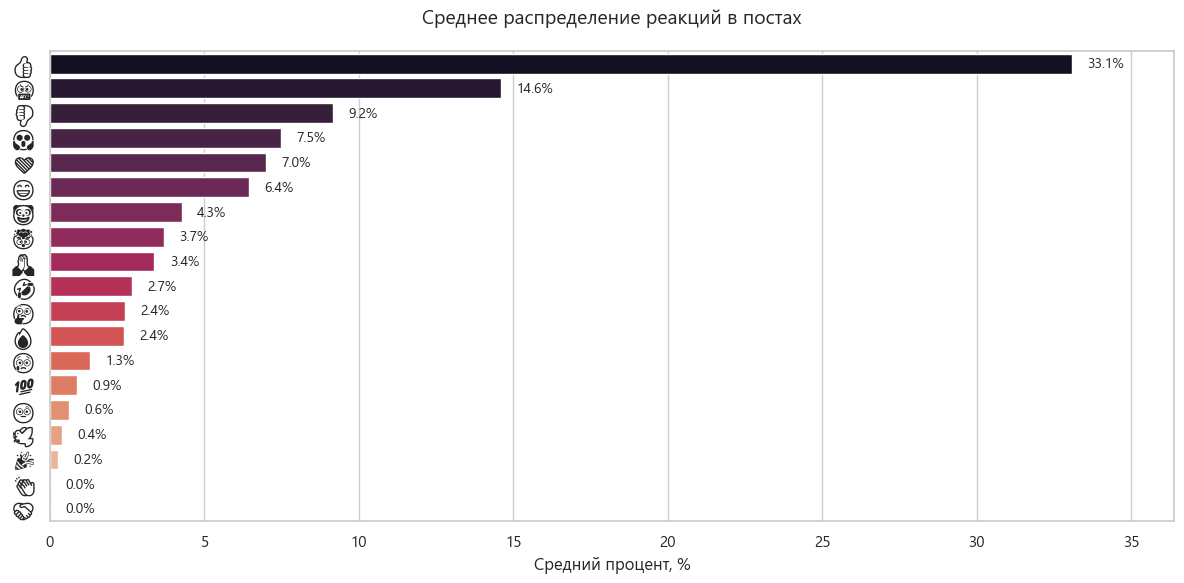

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

# Настройка основного шрифта для всего текста
plt.rcParams['font.family'] = 'Segoe UI'
plt.rcParams['font.size'] = 12

emoji_font = {'fontname': 'Segoe UI Emoji'}

mean_reactions = df_prepared[reactions].mean().sort_values(ascending=False)
mean_df = pd.DataFrame({
    'reaction': mean_reactions.index.str.replace('reaction_', ''),
    'mean_percent': mean_reactions.values
})

plt.figure(figsize=(12, 6))
barplot = sns.barplot(
    x='mean_percent',
    y='reaction',
    data=mean_df,
    palette="rocket",
    orient='h'
)

# Настройка подписей с эмодзи
for label in barplot.get_yticklabels():
    label.set_fontproperties(mpl.font_manager.FontProperties(family='Segoe UI Emoji'))
    label.set_fontsize(14)

plt.title('Среднее распределение реакций в постах', pad=20, fontsize=14)
plt.xlabel('Средний процент, %', fontsize=12)
plt.ylabel('')

plt.xlim(0, mean_df['mean_percent'].max() * 1.1)

for i, (name, value) in enumerate(zip(mean_df['reaction'], mean_df['mean_percent'])):
    plt.text(value + 0.5, i, f'{value:.1f}%', va='center', fontsize=10)

plt.tight_layout()
plt.show()

Распределение тэгов

C:\Users\Giesoft\AppData\Local\Temp\ipykernel_18876\1378706602.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


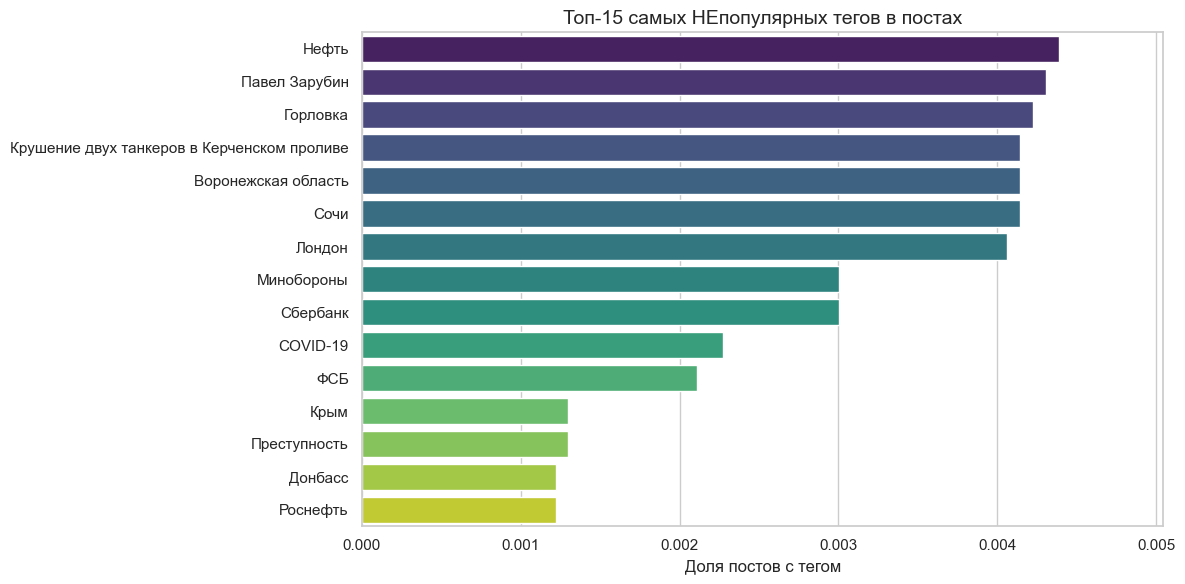

In [60]:
tags = combined_df.columns[combined_df.columns.str.startswith("tag_")]
tag_means = combined_df[tags].mean().sort_values(ascending=False)

tag_df = pd.DataFrame({
    'tag': tag_means.index.str.replace('tag_', ''),
    'frequency': tag_means.values
}).tail(15)  # Топ-15 тегов

sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))

barplot = sns.barplot(
    x='frequency',
    y='tag',
    data=tag_df,
    palette="viridis",
    orient='h'
)

plt.title('Топ-15 самых НЕпопулярных тегов в постах', fontsize=14)
plt.xlabel('Доля постов с тегом', fontsize=12)
plt.ylabel('')
plt.xlim(0, tag_df['frequency'].max() * 1.15)

plt.tight_layout()
plt.show()

C:\Users\Giesoft\AppData\Local\Temp\ipykernel_18876\2647717520.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


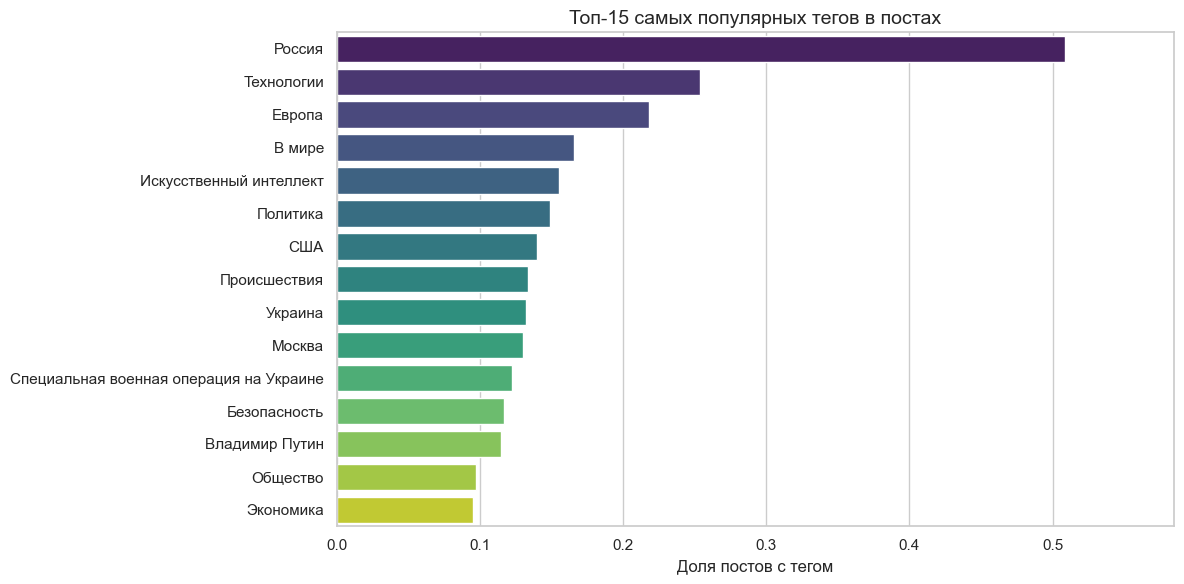

In [61]:
tag_means = combined_df[tags].mean().sort_values(ascending=False)

tag_df = pd.DataFrame({
    'tag': tag_means.index.str.replace('tag_', ''),
    'frequency': tag_means.values
}).head(15)  # Топ-15 тегов

sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))

barplot = sns.barplot(
    x='frequency',
    y='tag',
    data=tag_df,
    palette="viridis",
    orient='h'
)

plt.title('Топ-15 самых популярных тегов в постах', fontsize=14)
plt.xlabel('Доля постов с тегом', fontsize=12)
plt.ylabel('')
plt.xlim(0, tag_df['frequency'].max() * 1.15)

plt.tight_layout()
plt.show()

Среднее количество комментариев в зависимости от тэгов

C:\Users\Giesoft\AppData\Local\Temp\ipykernel_18876\4209586346.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


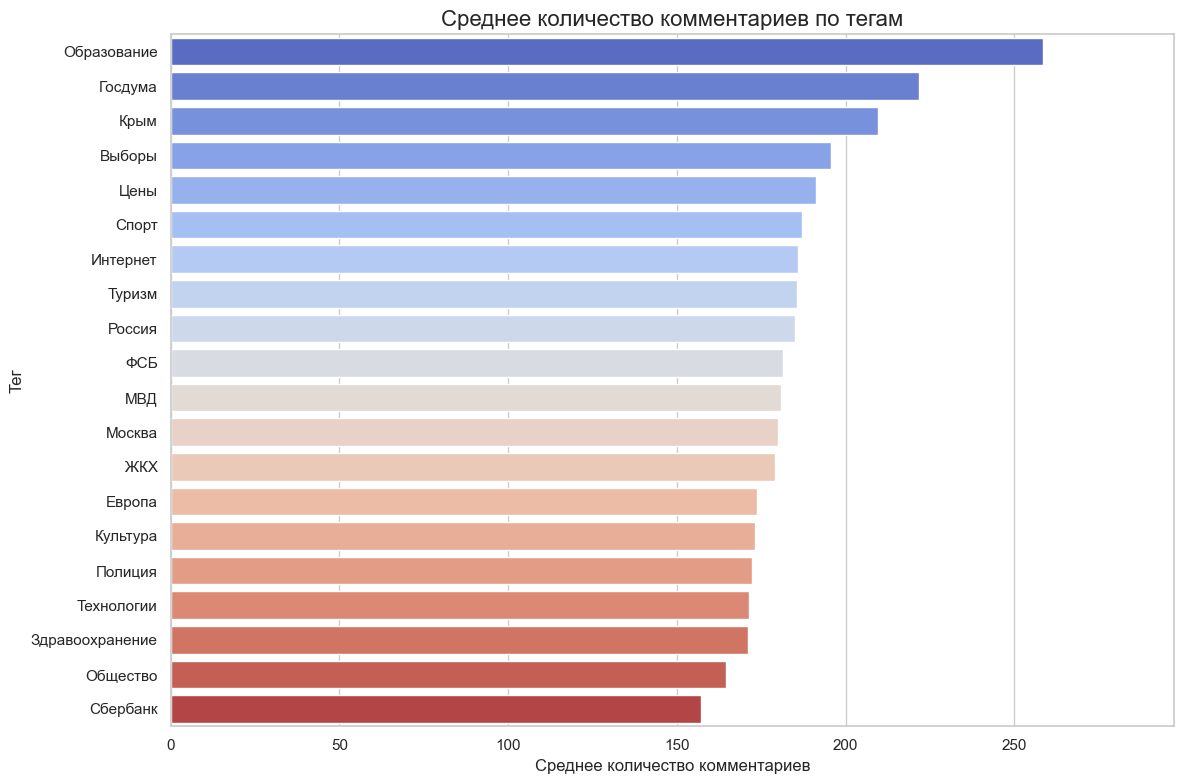

In [62]:

# Расчет среднего количества комментариев по тегам
tag_stats = []
for tag in df.columns[df.columns.str.startswith("tag_")]:
    mask = df[tag] == 1
    if mask.sum() > 0:  # Игнорируем теги без постов
        mean_comments = df.loc[mask, "comments"].mean()
        tag_stats.append({
            'tag': tag.replace('tag_', ''),
            'mean_comments': mean_comments,
            'post_count': mask.sum()
        })

stats_df = pd.DataFrame(tag_stats)
stats_df = stats_df[stats_df['post_count'] > 5]  # Минимум 5 постов с тегом
stats_df = stats_df.sort_values('mean_comments', ascending=False).head(20)

plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")

barplot = sns.barplot(
    x='mean_comments',
    y='tag',
    data=stats_df,
    palette="coolwarm",
    orient='h'
)

plt.title('Среднее количество комментариев по тегам', fontsize=16)
plt.xlabel('Среднее количество комментариев', fontsize=12)
plt.ylabel('Тег', fontsize=12)
plt.xlim(0, stats_df['mean_comments'].max() * 1.15)


plt.tight_layout()
plt.show()

Завосомость количества комментариев от количества и типа реакций

C:\Users\Giesoft\AppData\Local\Temp\ipykernel_18876\1756710060.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


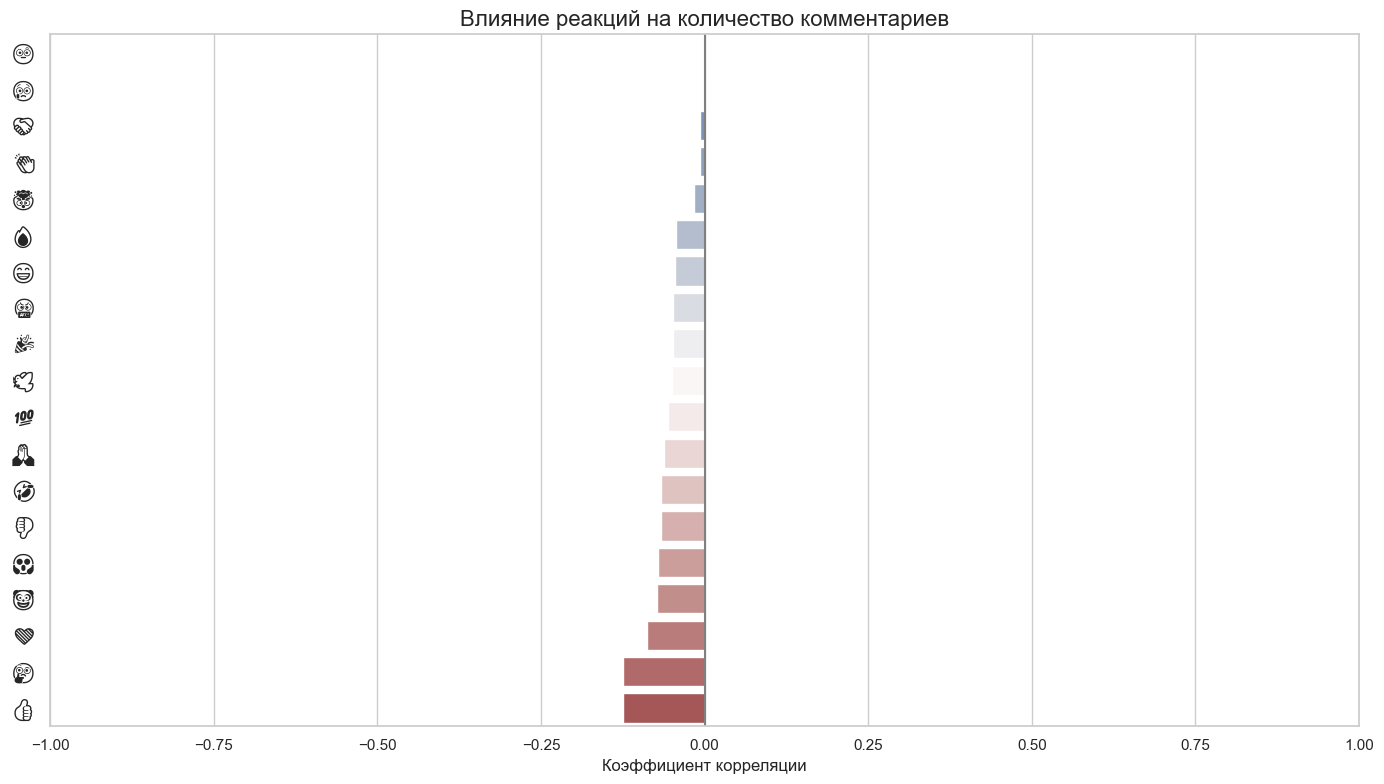

In [63]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 8))

# Расчет корреляции между реакциями и комментариями
correlations = df[reactions].corrwith(df["comments"]).sort_values(ascending=False)

corr_df = pd.DataFrame({
    'reaction': correlations.index.str.replace('reaction_', ''),
    'correlation': correlations.values
})

barplot = sns.barplot(
    x='correlation',
    y='reaction',
    data=corr_df,
    palette="vlag",  # Дивергентная палитра для отрицательных/положительных значений
    orient='h'
)

plt.title('Влияние реакций на количество комментариев', fontsize=16)
plt.xlabel('Коэффициент корреляции', fontsize=12)
plt.ylabel('')
plt.xlim(-1, 1)

# Настройка подписей с эмодзи
for label in barplot.get_yticklabels():
    label.set_fontproperties(mpl.font_manager.FontProperties(family='Segoe UI Emoji'))
    label.set_fontsize(14)

plt.axvline(0, color='gray')
plt.tight_layout()
plt.show()

Завосомость количества просмотров от количества и типа реакций

C:\Users\Giesoft\AppData\Local\Temp\ipykernel_18876\4021886036.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


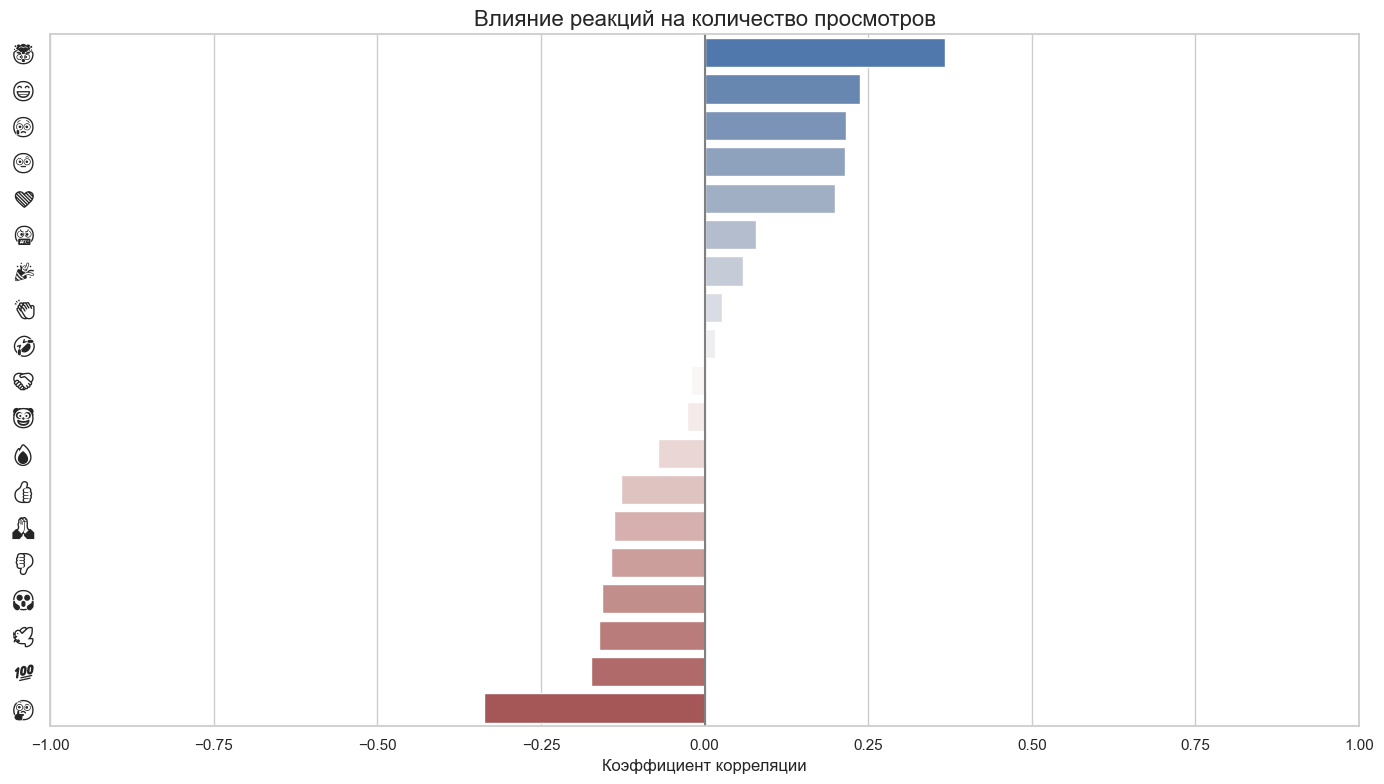

In [64]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 8))

# Расчет корреляции между реакциями и просмотрами
correlations = df_prepared[reactions].corrwith(df_prepared["normalized_views"]).sort_values(ascending=False)

corr_df = pd.DataFrame({
    'reaction': correlations.index.str.replace('reaction_', ''),
    'correlation': correlations.values
})

barplot = sns.barplot(
    x='correlation',
    y='reaction',
    data=corr_df,
    palette="vlag",  # Дивергентная палитра для отрицательных/положительных значений
    orient='h'
)

plt.title('Влияние реакций на количество просмотров', fontsize=16)
plt.xlabel('Коэффициент корреляции', fontsize=12)
plt.ylabel('')
plt.xlim(-1, 1)

# Настройка подписей с эмодзи
for label in barplot.get_yticklabels():
    label.set_fontproperties(mpl.font_manager.FontProperties(family='Segoe UI Emoji'))
    label.set_fontsize(14)

plt.axvline(0, color='gray')
plt.tight_layout()
plt.show()

Влияние медиа на количество просмотров.

C:\Users\Giesoft\AppData\Local\Temp\ipykernel_18876\225234745.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


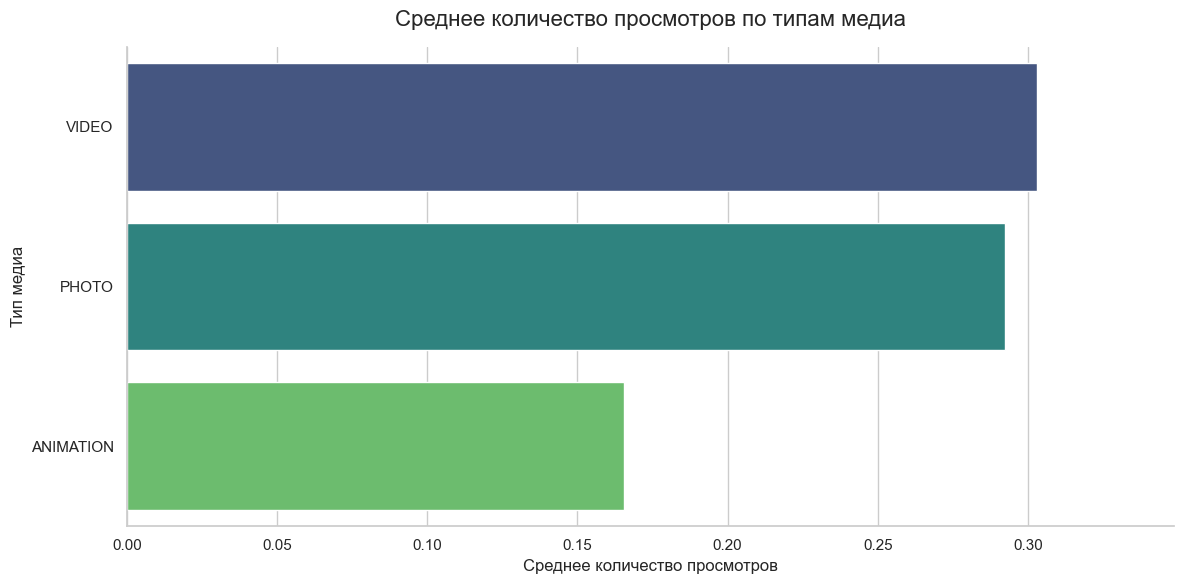

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


media_df = df_prepared[['media', 'normalized_views']].copy().dropna()
media_stats = media_df.groupby('media')['normalized_views'].agg(['mean', 'count']).reset_index()
media_stats = media_stats[media_stats['count'] >= 5]
media_stats = media_stats.sort_values('mean', ascending=False)

plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

barplot = sns.barplot(
    x='mean',
    y='media',
    data=media_stats,
    palette="viridis",
    orient='h'
)

plt.title('Среднее количество просмотров по типам медиа', fontsize=16, pad=15)
plt.xlabel('Среднее количество просмотров', fontsize=12)
plt.ylabel('Тип медиа', fontsize=12)
plt.xlim(0, media_stats['mean'].max() * 1.15)

sns.despine()
plt.tight_layout()
plt.show()

Зависимость просмотров от времени

In [66]:
df_prepared['date'] = pd.to_datetime(df_prepared['date'], format='%Y-%m-%d %H:%M:%S')
df_prepared['hour'] = df_prepared['date'].dt.hour

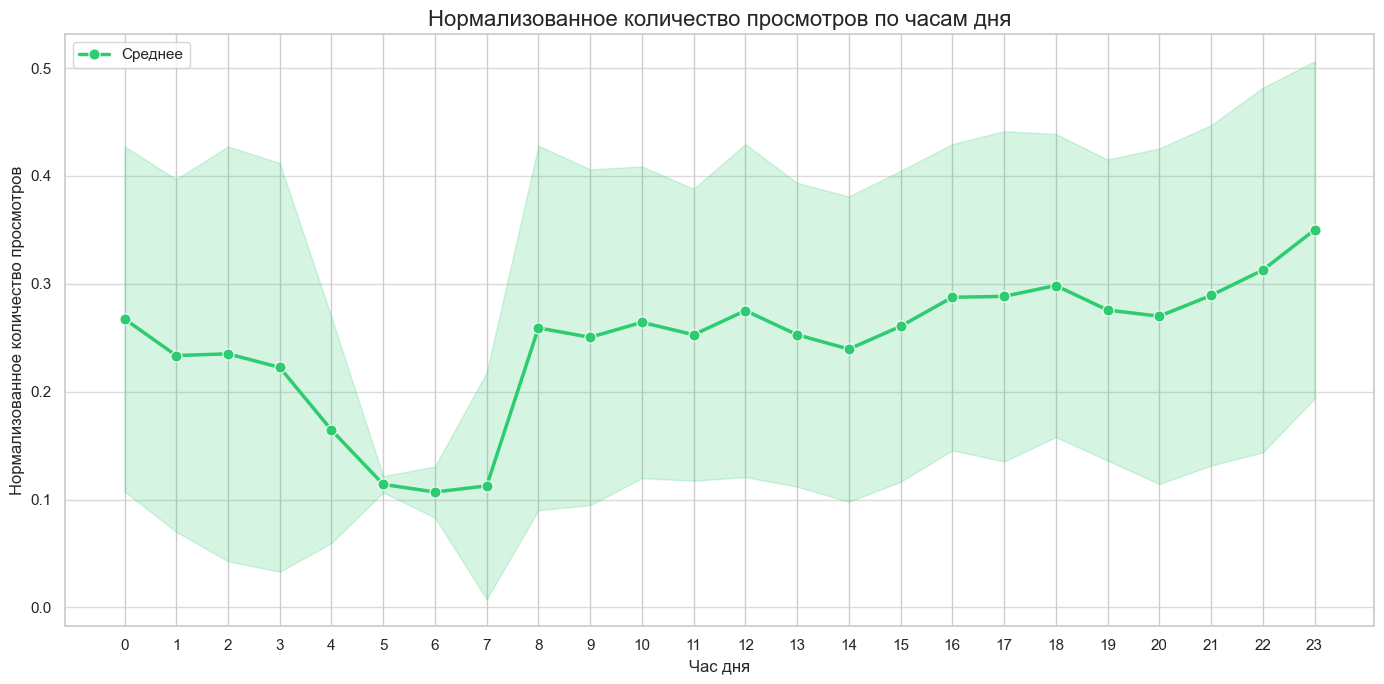

In [70]:
# Группировка по часам и расчет статистик
hourly_stats = df_prepared.groupby('hour')['normalized_views'].agg(['mean', 'std']).reset_index()

plt.figure(figsize=(14, 7))
sns.set_style("whitegrid")

sns.lineplot(
    x='hour',
    y='mean',
    data=hourly_stats,
    marker='o',
    color='#2ecc71',
    linewidth=2.5,
    markersize=8,
    label='Среднее'
)

# Заполнение области +1/-1 стандартное отклонение
plt.fill_between(
    hourly_stats['hour'],
    hourly_stats['mean'] - hourly_stats['std'],
    hourly_stats['mean'] + hourly_stats['std'],
    color='#2ecc71',
    alpha=0.2
)

plt.title('Нормализованное количество просмотров по часам дня', fontsize=16)
plt.xlabel('Час дня', fontsize=12)
plt.ylabel('Нормализованное количество просмотров', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(axis='y', alpha=0.7)

plt.legend()
plt.tight_layout()
plt.show()


Зависимость количества просмотров от тэгов

C:\Users\Giesoft\AppData\Local\Temp\ipykernel_18876\3849191630.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


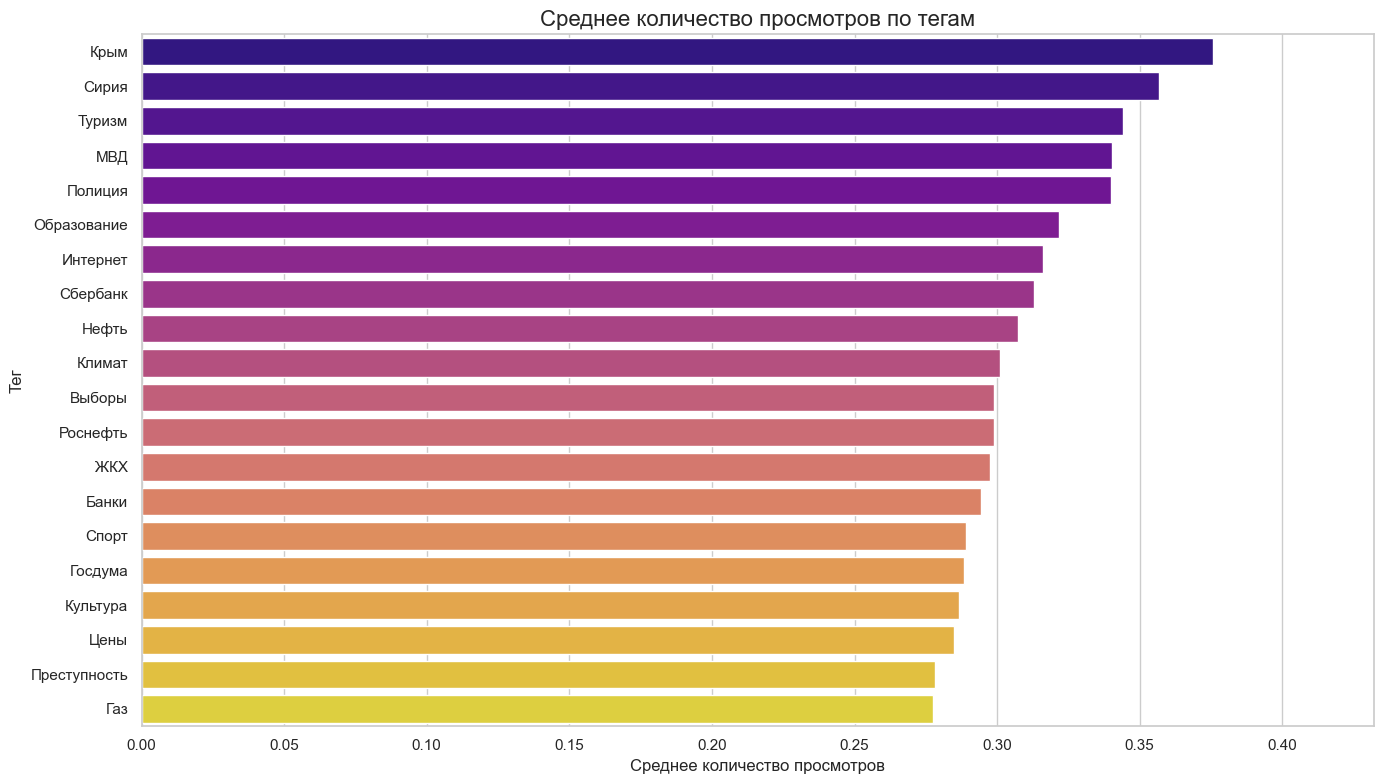

In [71]:
tag_stats = []
for tag in tags:
    mask = combined_df[tag] == 1
    if mask.sum() > 0:  # Игнорируем теги без постов
        mean_views = combined_df.loc[mask, "normalized_views"].mean()
        tag_stats.append({
            'tag': tag.replace('tag_', ''),
            'mean_views': mean_views,
            'post_count': mask.sum()
        })

stats_df = pd.DataFrame(tag_stats)
stats_df = stats_df[stats_df['post_count'] >= 5]  # Теги с минимум 5 постами
stats_df = stats_df.sort_values('mean_views', ascending=False).head(20)

plt.figure(figsize=(14, 8))
sns.set_theme(style="whitegrid")

barplot = sns.barplot(
    x='mean_views',
    y='tag',
    data=stats_df,
    palette="plasma",
    orient='h'
)

plt.title('Среднее количество просмотров по тегам', fontsize=16)
plt.xlabel('Среднее количество просмотров', fontsize=12)
plt.ylabel('Тег', fontsize=12)
plt.xlim(0, stats_df['mean_views'].max() * 1.15)

plt.tight_layout()
plt.show()

Корреляций временем и комментариями.

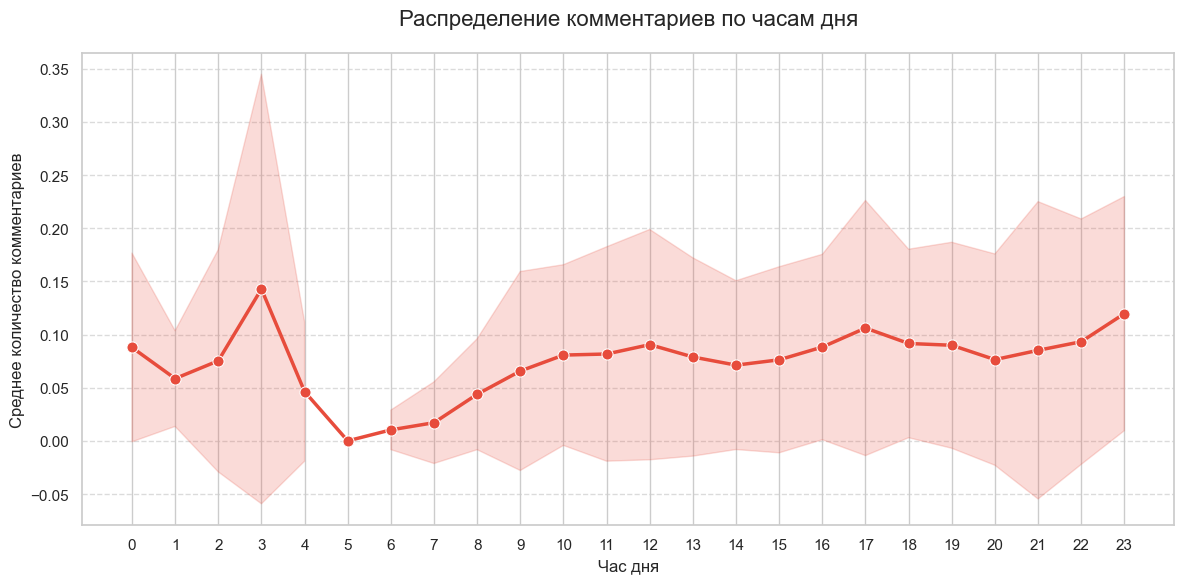

In [78]:
hourly_comments = df_prepared.groupby('hour')['normalized_comments'].agg(['mean', 'std']).reset_index()

plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

ax = sns.lineplot(
    x='hour',
    y='mean',
    data=hourly_comments,
    color='#e74c3c',
    linewidth=2.5,
    marker='o',
    markersize=8
)

# Заполнение области стандартного отклонения
plt.fill_between(
    hourly_comments['hour'],
    hourly_comments['mean'] - hourly_comments['std'],
    hourly_comments['mean'] + hourly_comments['std'],
    color='#e74c3c',
    alpha=0.2
)

plt.title('Распределение комментариев по часам дня', fontsize=16, pad=20)
plt.xlabel('Час дня', fontsize=12)
plt.ylabel('Среднее количество комментариев', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Корреляция между реакциями и часом

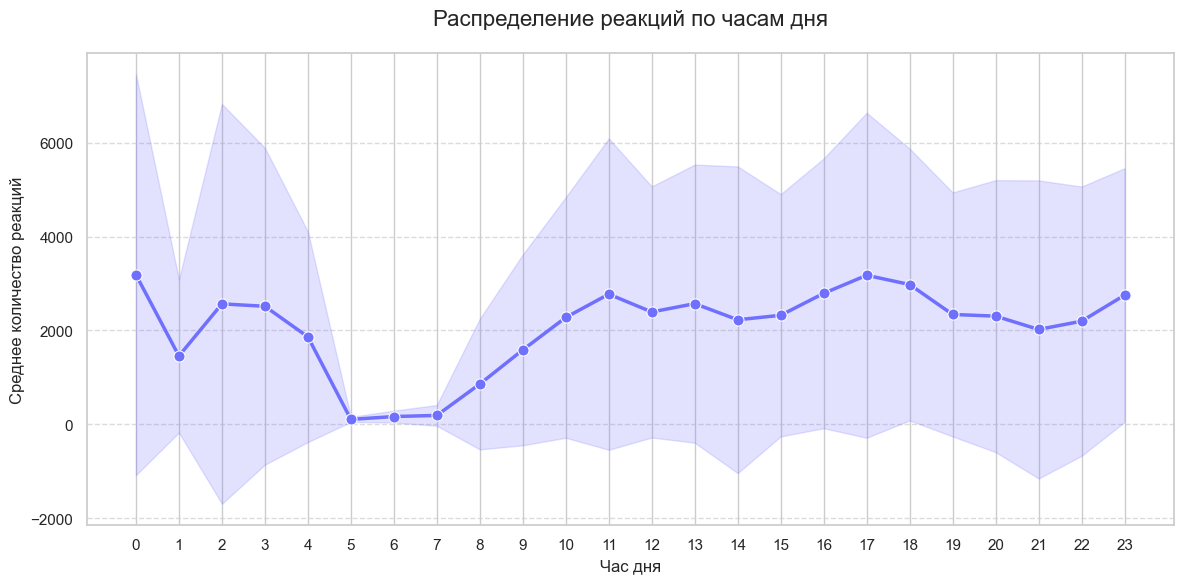

In [80]:
df_prepared['total_reactions'] = df[reactions].sum(axis=1)
hourly_reactions = df_prepared.groupby('hour')['total_reactions'].agg(['mean', 'std']).reset_index()

plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

ax = sns.lineplot(
    x='hour',
    y='mean',
    data=hourly_reactions,
    color='#7070ff',
    linewidth=2.5,
    marker='o',
    markersize=8
)

# Заполнение области стандартного отклонения
plt.fill_between(
    hourly_reactions['hour'],
    hourly_reactions['mean'] - hourly_reactions['std'],
    hourly_reactions['mean'] + hourly_reactions['std'],
    color='#7070ff',
    alpha=0.2
)

# Настройка графика
plt.title('Распределение реакций по часам дня', fontsize=16, pad=20)
plt.xlabel('Час дня', fontsize=12)
plt.ylabel('Среднее количество реакций', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Распределение среднего числа комментариев по самым популярным тегам

In [ ]:
df_prepared['total_comments'] = df['comments']

selected_tags = [
    "Россия", "Технологии", "Европа", "В мире", "Искусственный интеллект",
    "Политика", "США", "Происшествия", "Украина", "Москва",
    "Специальная военная операция на Украине", "Безопасность", "Владимир Путин", "Общество", "Экономика"
]

tag_comment_stats = []
for tag in selected_tags:
    if f'tag_{tag}' in df.columns:
        mask = df[f'tag_{tag}'] == 1
        if mask.sum() > 0:
            mean_comments = df.loc[mask, 'comments'].mean()
            tag_comment_stats.append({
                'tag': tag,
                'mean_comments': mean_comments,
                'post_count': mask.sum()
            })

stats_df = pd.DataFrame(tag_comment_stats)
stats_df = stats_df[stats_df['post_count'] >= 5]

tag_grouped = stats_df.groupby('tag')['mean_comments'].agg(['mean', 'std']).reset_index()

plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

ax = sns.barplot(
    x='tag',
    y='mean',
    data=tag_grouped,
    color='#7070ff',
    linewidth=2.5
)

plt.title('Распределение среднего числа комментариев по самым популярным тегам', fontsize=16, pad=20)
plt.xlabel('Тег', fontsize=12)
plt.ylabel('Среднее количество комментариев', fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()